<a href="https://colab.research.google.com/github/guilhermecgs/apdoac/blob/temp/apdoac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados da tese de mestrado APDOAC

In [1]:
!npx degit guilhermecgs/apdoac/dados -f dados

npx: installed 1 in 2.278s
> cloned guilhermecgs/apdoac#master to dados


In [2]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [3]:
! pip install pandas
! pip install tqdm
! pip install xlsx2csv
! pip install genderbr
! pip install --upgrade genderbr


     |████████████████████████████████| 245kB 5.6MB/s 
  Created wheel for xlsx2csv: filename=xlsx2csv-0.7.7-cp36-none-any.whl size=44871 sha256=12b20356a4bb079783fa5abb0e2aea2266fc0eaa2eadfefa7c3d4ad838801a69
  Stored in directory: /root/.cache/pip/wheels/9f/d1/6e/1b6cbf7dcfe72469d95f2cd331a373e8e2fde30a5946d61dfd
Successfully built xlsx2csv
  Created wheel for genderbr: filename=genderbr-0.1.2-cp36-none-any.whl size=2268 sha256=cf8f5e790280b003c58d79779d9ba0dc85b935db9a039950dd655ed037fb6840
  Stored in directory: /root/.cache/pip/wheels/40/72/3c/16afd51aa7b8d98204f781c2854ff8b37623665e6e9fcc20f6
Successfully built genderbr
Requirement already up-to-date: genderbr in /usr/local/lib/python3.6/dist-packages (0.1.2)


In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
from IPython.display import display, HTML


In [7]:
import pickle
import os.path

def save(obj, name ):
  with open(name + '.pkl', 'wb') as f:
    pickle.dump(obj, f, 3)

def load(name):
  try:
    with open(name + '.pkl', 'rb') as f:
      return pickle.load(f)
  except Exception as ex:
    return {}

if not os.path.isfile('dados/cnpq_2002-2019_com_sexo.csv') and not os.path.isfile('dados/cnpq_2002-2019_com_sexo.csv.zip'):
  result = load('dados/temp_names')
  print('numero de nomes processados anteriormente: ' + str(len(result)))
  
  df_cnpq_2002_2019_ic = pd.read_excel('dados/cnpq_2002-2019_ic.xlsx')
  df_cnpq_2002_2019_pq_dt_mt = pd.read_excel('dados/cnpq_2002-2019_pq_dt_mt.xlsx')

  df_cnpq_2002_2019 = pd.concat([df_cnpq_2002_2019_ic, df_cnpq_2002_2019_pq_dt_mt])
  
  def primeiro_nome(nome):
    return nome.split(' ')[0]

  df_cnpq_2002_2019['primeiro_nome'] = df_cnpq_2002_2019['Beneficiário'].apply(lambda nome: primeiro_nome(nome))

  primeiros_nomes_unicos = df_cnpq_2002_2019['primeiro_nome'].unique()

  from genderbr import get_gender
  
  i = 0
  for primeiro_nome in tqdm(primeiros_nomes_unicos):
    if primeiro_nome not in result:
      result[primeiro_nome] = str(get_gender(primeiro_nome))
      if i % 30 == 0:
        save(result, 'dados/temp_names')
    i = i + 1

  df_cnpq_2002_2019['sexo'] = df_cnpq_2002_2019['primeiro_nome'].apply(lambda primeiro_nome: result[primeiro_nome])

  df_cnpq_2002_2019.to_excel('dados/cnpq_2002-2019_com_sexo.xlsx')
  df_cnpq_2002_2019.to_csv('dados/cnpq_2002-2019_com_sexo.csv')


In [9]:
import zipfile
with zipfile.ZipFile('dados/cnpq_2002-2019_com_sexo.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('dados')

In [10]:
import os
import glob
from tqdm.notebook import trange, tqdm
from xlsx2csv import Xlsx2csv
  

def concat(pathname):
  arquivos = glob.glob(pathname)
  print('Unindo arquivos:')
  print('\n    -'.join(arquivos))

  dfs = []
  for arquivo in tqdm(arquivos):
    arquivo_csv = arquivo.replace('xlsx', 'csv')
    if not os.path.isfile(arquivo_csv):
      Xlsx2csv(arquivo, outputencoding="utf-8").convert(arquivo.replace('xlsx', 'csv'))

    dfs.append(pd.read_csv(arquivo_csv))
    
  return pd.concat(dfs)


In [11]:
df_pq = concat('dados/*.csv')
#df_discentes = concat('discente/*.xlsx')
#df_docentes = concat('docente/*.xlsx')
 

Unindo arquivos:
dados/cnpq_2002-2019_com_sexo.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [35]:
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 400)
from IPython.display import display, HTML
# display(df1)
# display(HTML(df2.to_html()))


In [22]:
def por_ano(df, grau='PQ - Produtividade em Pesquisa'):

  if 'TP_SEXO_DOCENTE' in df.columns:
    coluna_sexo = 'TP_SEXO_DOCENTE'
    coluna_grau = 'NM_GRAU_PROGRAMA'
    categoria = 'docentes'
    coluna_grande_area = 'NM_GRANDE_AREA_CONHECIMENTO'
    valor_masculino = 'MASCULINO'
    valor_feminino = 'FEMININO'
    coluna_ano = 'AN_BASE'

  if 'TP_SEXO_DISCENTE' in df.columns:
    coluna_sexo = 'TP_SEXO_DISCENTE'
    coluna_grau = 'NM_GRAU_PROGRAMA'
    categoria = 'discentes'
    coluna_grande_area = 'NM_GRANDE_AREA_CONHECIMENTO'
    valor_masculino = 'MASCULINO'
    valor_feminino = 'FEMININO'
    coluna_ano = 'AN_BASE'

  if 'Beneficiário' in df.columns:
    coluna_sexo = 'sexo'
    coluna_grau = 'Modalidade'
    categoria = 'PQ - Produtividade em Pesquisa'
    coluna_grande_area = 'Grande Área'
    valor_masculino = 'M'
    valor_feminino = 'F'
    coluna_ano = 'Ano Referência'

  df_filtrado = df[df[coluna_grau] == grau]

  anos = df.dropna(subset=[coluna_ano])[coluna_ano].unique()
  anos = list(range(int(anos.min()), int(anos.max()) + 1, 1))
  anos.sort()
  
  values_m = []
  values_f = []

  def obtem_numero(sexo, ano):
    total = len(df_filtrado[((df_filtrado[coluna_grande_area].str.lower() == 'engenharias')  
                      | (df_filtrado[coluna_grande_area].str.lower() == 'ciências exatas e da terra')) 
                      & ((df_filtrado[coluna_sexo] == valor_masculino) | (df_filtrado[coluna_sexo] == valor_feminino))
                      & (df_filtrado[coluna_ano] == ano)])
    
    para_o_sexo = len(df_filtrado[((df_filtrado[coluna_grande_area].str.lower() == 'engenharias')  
                      | (df_filtrado[coluna_grande_area].str.lower() == 'ciências exatas e da terra')) 
                      & (df_filtrado[coluna_sexo] == sexo)
                      & (df_filtrado[coluna_ano] == ano)])

    if total:
      return para_o_sexo / total * 100.0
    else:
      return 0

  for ano in anos:
    values_m.append(obtem_numero(valor_masculino, ano))
    values_f.append(obtem_numero(valor_feminino, ano))
    
  df = pd.DataFrame({'MASCULUNO': values_m, 'FEMINIMO': values_f}, index=map(int, anos))
  ax = df.plot.bar(figsize=(15, 10), title='Percentual de bolsas de {grau} por ano para {categoria}'
        .format(grau=grau.lower(), categoria=categoria))
  ax.grid(True)
  ax.set_xlabel("Ano")
  ax.set_ylim([0,100])
  ax.set_ylabel("Percentual de bolsas de {grau} para {categoria}".format(grau=grau.lower(), categoria=categoria))
  ax.legend(loc='upper right')

  for p in ax.patches:
    if round(p.get_height()):
      ax.annotate(str(int(round(p.get_height()))) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [94]:
def master_data(df):
  if 'TP_SEXO_DOCENTE' in df.columns:
    coluna_sexo = 'TP_SEXO_DOCENTE'
    coluna_grau = 'NM_GRAU_PROGRAMA'
    categoria = 'docentes'
    coluna_grande_area = 'NM_GRANDE_AREA_CONHECIMENTO'
    valor_masculino = 'MASCULINO'
    valor_feminino = 'FEMININO'
    coluna_ano = 'AN_BASE'

  if 'TP_SEXO_DISCENTE' in df.columns:
    coluna_sexo = 'TP_SEXO_DISCENTE'
    coluna_grau = 'NM_GRAU_PROGRAMA'
    categoria = 'discentes'
    coluna_grande_area = 'NM_GRANDE_AREA_CONHECIMENTO'
    valor_masculino = 'MASCULINO'
    valor_feminino = 'FEMININO'
    coluna_ano = 'AN_BASE'

  if 'Beneficiário' in df.columns:
    coluna_sexo = 'sexo'
    coluna_grau = 'Linha de Fomento'
    categoria = ''
    coluna_grande_area = 'Grande Área'
    valor_masculino = 'M'
    valor_feminino = 'F'
    coluna_ano = 'Ano Referência'

  return [coluna_sexo, coluna_grau, categoria, coluna_grande_area, valor_masculino, valor_feminino, coluna_ano]

In [95]:
def describe(df):
  max_lenght = 10
  for column in df.columns:
    print(column)
    unique_values = df_pq[column].unique()
    if len(unique_values) < max_lenght:
      print(unique_values)
    else:
      print(unique_values[0:max_lenght])
      print('...')

describe(df_pq)

Unnamed: 0
[0 1 2 3 4 5 6 7 8 9]
...
Ano Referência
[2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012.   nan 2009.]
...
Processo
['126311/2019-6' '126345/2019-8' '135319/2019-6' '134750/2019-5'
 '156576/2018-0' '115285/2018-0' '134759/2018-4' '143583/2018-2'
 '164886/2019-2' '144654/2018-0']
...
Beneficiário
['Abdel Fadyl Chabi' 'Abdel-Farid MAMADOU IDRISSOU' 'Abdiel de Athayde'
 'Abdul Latif Hamzé' 'Abel Grangeiro de Souza' 'Abel Pereira Lima Soares'
 'Abel Ramalho Galvão' 'Abel Rodrigues Lima' 'Abgail Machado da Silva'
 'Abhner Pinto de Almeida']
...
Linha de Fomento
['Bolsas de Iniciação Científica' 'Bolsas de Doutorado'
 'Bolsas de Produtividade em Pesquisa e Tecnologia' 'Bolsas de Mestrado']
Modalidade
['IC - Iniciação Científica' 'GD - Doutorado'
 'PQ - Produtividade em Pesquisa' 'GM - Mestrado'
 'GDE - Doutorado no Exterior']
Categoria/Nível
[nan '2' '1B' '1C' '1D' '1A' 'SR' ' ' '2F' '2C']
...
Nome Chamada
['PIBIC - CHAMADA CNPq N º 03/2018 -  PROGRAMA INSTITUCIONAL DE BOLSAS DE I

In [100]:
%load_ext google.colab.data_table
from google.colab import data_table
data_table.DataTable(df_pq, include_index=False, max_columns=30, max_rows=50, num_rows_per_page=10)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Unnamed: 0,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,Subárea,Instituição Origem,Sigla UF Origem,País Origem,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,País Destino,Valor Pago,v22,primeiro_nome,sexo
0,0,2019.0,126311/2019-6,Abdel Fadyl Chabi,Bolsas de Iniciação Científica,IC - Iniciação Científica,NaN,PIBIC - CHAMADA CNPq N º 03/2018 - PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO CIENTÍFICA (PIBIC),Programa Institucional de Bolsas de Iniciação Científica - PIBIC,Ciências Exatas e da Terra,Matemática,Matemática Aplicada,Universidade Federal do Amazonas,AM,BRA - Brasil,Universidade Federal do Amazonas,UFAM,UFAM,Manaus,AM,BRA - Brasil,2000.0,NaN,Abdel,M
1,1,2019.0,126345/2019-8,Abdel-Farid MAMADOU IDRISSOU,Bolsas de Iniciação Científica,IC - Iniciação Científica,NaN,PIBIC - CHAMADA CNPq N º 03/2018 - PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO CIENTÍFICA (PIBIC),Programa Institucional de Bolsas de Iniciação Científica - PIBIC,Engenharias,Engenharia Biomédica,Bioengenharia,Instituto Federal do Ceará - Reitoria,CE,BRA - Brasil,Instituto Federal do Ceará - Reitoria,IFCE,IFCE,Fortaleza,CE,BRA - Brasil,2000.0,NaN,Abdel-Farid,None
2,2,2019.0,135319/2019-6,Abdiel de Athayde,Bolsas de Iniciação Científica,IC - Iniciação Científica,NaN,PIBIC - CHAMADA CNPq Nº 04/2018 - PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO CIENTÍFICA NAS AÇÕES AFIRMATIVAS (PIBIC-Af),Programa Institucional de Bolsas de Iniciação Científica - PIBIC,Ciências Biológicas,Microbiologia,Micologia,Instituto Federal de Santa Catarina,SC,BRA - Brasil,Instituto Federal de Santa Catarina,IFSC,IFSC,Florianópolis,SC,BRA - Brasil,2000.0,NaN,Abdiel,M
3,3,2019.0,134750/2019-5,Abdul Latif Hamzé,Bolsas de Iniciação Científica,IC - Iniciação Científica,NaN,PIBIC - PIBIC 2016/2018,Programa Institucional de Bolsas de Iniciação Científica - PIBIC,Ciências Biológicas,Morfologia,Anatomia,Universidade de Marília,SP,BRA - Brasil,Universidade de Marília,UNIMAR,UNIMAR,Marília,SP,BRA - Brasil,2000.0,NaN,Abdul,M
4,4,2019.0,156576/2018-0,Abel Grangeiro de Souza,Bolsas de Iniciação Científica,IC - Iniciação Científica,NaN,PIBIC - CHAMADA CNPq N º 03/2018 - PROGRAMA INSTITUCIONAL DE BOLSAS DE INICIAÇÃO CIENTÍFICA (PIBIC),Programa Institucional de Bolsas de Iniciação Científica - PIBIC,Ciências Exatas e da Terra,Astronomia,Astrofísica Estelar,Universidade Presbiteriana Mackenzie,SP,BRA - Brasil,Universidade Presbiteriana Mackenzie,MACKENZIE,MACKENZIE,São Paulo,SP,BRA - Brasil,2800.0,NaN,Abel,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535144,786461,2002.0,140472/2001-0,Zuleide Martins Chaves,Bolsas de Doutorado,GD - Doutorado,NaN,NaN,PROGRAMA DE POS GRADUAÇÃO,Ciências Agrárias,Agronomia,Fitopatologia,NaN,NaN,-,Universidade Federal de Lavras,UFLA,UFLA,Lavras,MG,BRA - Brasil,NaN,NaN,Zuleide,F
1535145,786462,2002.0,306062/1988-7,Zulema Abraham,Bolsas de Produtividade em Pesquisa e Tecnologia,PQ - Produtividade em Pesquisa,1C,CA 10/2000 PQ,PROGRAMA BASICO DE ASTRONOMIA,Ciências Exatas e da Terra,Astronomia,Astrofísica do Meio Interestelar,NaN,NaN,-,Departamento de Astronomia,USP,USP,São Paulo,SP,BRA - Brasil,NaN,NaN,Zulema,F
1535146,786463,2002.0,140547/2001-0,Zulmar Soares Machado Junior,Bolsas de Doutorado,GD - Doutorado,NaN,NaN,PROGRAMA DE POS GRADUAÇÃO,Engenharias,Engenharia Elétrica,Sistemas Elétricos de Potência,NaN,NaN,-,Universidade Federal do Rio de Janeiro,UFRJ,UFRJ,Rio de Janeiro,RJ,BRA - Brasil,NaN,NaN,Zulmar,M
1535147,786464,2002.0,140547/2001-0,Zulmar Soares Machado Junior,Bolsas de Doutorado,GD - Doutorado,NaN,Cotas do Programa de Pós-Graduação,PROGRAMA DE POS GRADUAÇÃO,Engenharias,Engenharia Elétrica,Sistemas Elétricos de Potência,NaN,NaN,-,Universidade Federal do Rio de Janeiro,UFRJ,UFRJ,Rio de Janeiro,RJ,BRA - Brasil,NaN,NaN,Zulmar,M


In [97]:
def por_curso(df, grau='PQ - Produtividade em Pesquisa'):

  coluna_sexo, coluna_grau, categoria, coluna_grande_area, valor_masculino, valor_feminino, coluna_ano = master_data(df)

  df_filtrado = df[df[coluna_grau] == grau]

  areas_invalidas = ['indefinido', 'outra']
  areas = df[coluna_grande_area].unique()
  
  def filter_invalid_areas(area):
    if pd.isnull(area):
      return False
    try:
      if area.lower() in areas_invalidas:
        return False
    except:
        return False
    return True

  areas = [area for area in areas if filter_invalid_areas(area)]
  
  values_m = []
  values_f = []

  def obtem_numero(sexo, area):
    total = len(df_filtrado[((df_filtrado[coluna_sexo] == valor_masculino) 
                           | (df_filtrado[coluna_sexo] == valor_feminino))
                            & (df_filtrado[coluna_grande_area] == area)])
    
    para_o_sexo = len(df_filtrado[(df_filtrado[coluna_sexo] == sexo)
                                & (df_filtrado[coluna_grande_area] == area)])
    try:
      return para_o_sexo / total * 100.0
    except:
      return 0.0

  for area in areas:
    values_m.append(obtem_numero(valor_masculino, area))
    values_f.append(obtem_numero(valor_feminino, area))
  
  df = pd.DataFrame({'MASCULUNO': values_m, 'FEMINIMO': values_f}, index=areas)
  ax = df.plot.bar(figsize=(15, 10), title='Percentual de {grau} por grande área de conhecimento'
        .format(grau=grau.lower()))
  ax.grid(True)
  ax.set_xlabel("Grande área de conhecimento")
  ax.set_ylim([0,100])
  ax.set_ylabel("Percentual de {grau}".format(grau=grau.lower()))
  ax.legend(loc='upper right')

  for p in ax.patches:
    if round(p.get_height()):
      ax.annotate(str(int(round(p.get_height()))) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

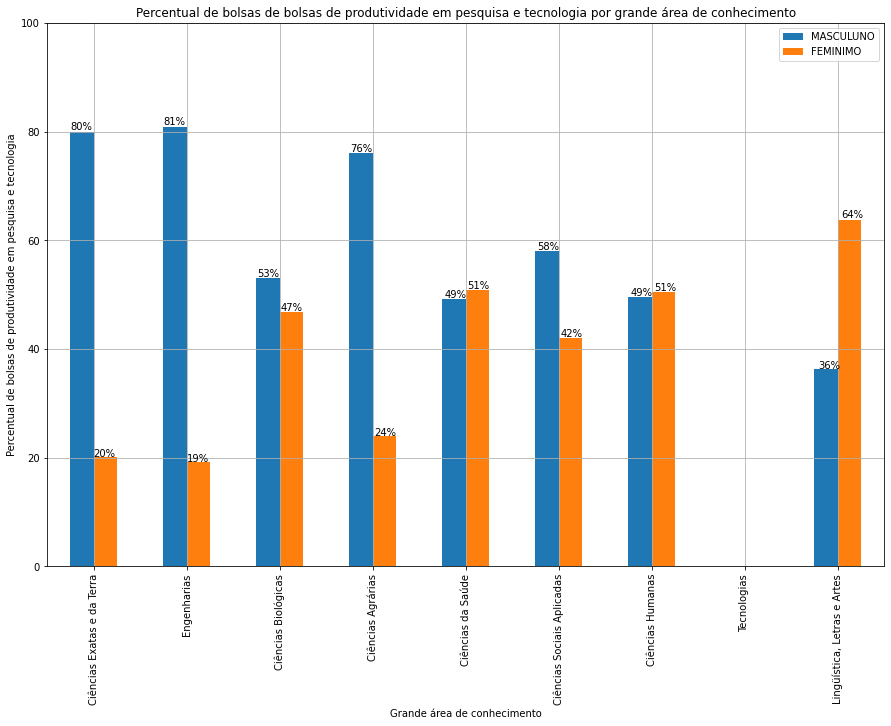

In [98]:
por_ano(df_pq)
# por_ano(df_discentes, 'MESTRADO')
# por_ano(df_discentes, 'DOUTORADO')
# por_ano(df_docentes, grau='MESTRADO')
# por_ano(df_docentes, grau='DOUTORADO')

por_curso(df_pq, grau='Bolsas de Iniciação Científica')
por_curso(df_pq, grau='Bolsas de Mestrado')
por_curso(df_pq, grau='Bolsas de Doutorado')
por_curso(df_pq, grau='Bolsas de Produtividade em Pesquisa e Tecnologia')

# por_curso(df_discentes, grau='MESTRADO')
# por_curso(df_discentes, grau='DOUTORADO')
# por_curso(df_docentes, grau='MESTRADO')
# por_curso(df_docentes, grau='DOUTORADO')